<a href="https://colab.research.google.com/github/carlyle1233/22-2_ML/blob/main/DecisionTree_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data import and Data split: preprocessing

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, f1_score, classification_report 
from sklearn.tree import export_graphviz 

In [29]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/Fvote.csv', encoding='utf-8')

In [30]:
data.columns

Index(['Unnamed: 0', 'gender_female', 'gender_male', 'region_Chungcheung',
       'region_Honam', 'region_Others', 'region_Sudo', 'region_Youngnam',
       'edu', 'income', 'age', 'score_gov', 'score_progress',
       'score_intention', 'vote', 'parties'],
      dtype='object')

In [31]:
data

,Unnamed: 0,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,0,1,0,0,0,0,1,1.0,0.666667,0.666667,0.25,0.25,0.75,1,2
1,1,0,1,0,0,1,0,0,0.5,0.666667,0.666667,0.25,0.75,0.50,0,3
2,2,0,1,0,1,0,0,0,0.0,0.333333,1.000000,0.00,0.50,0.45,1,4
3,3,1,0,0,0,0,1,0,0.5,0.000000,0.666667,1.00,0.75,0.40,1,1
4,4,0,1,0,0,0,1,0,0.0,0.333333,1.000000,0.75,0.50,0.35,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,0,1,0,0,0,0,1,0.0,1.000000,1.000000,0.50,0.50,0.20,1,2
207,207,0,1,0,0,0,1,0,0.5,0.000000,0.333333,0.50,0.75,0.40,1,4
208,208,0,1,1,0,0,0,0,0.5,0.000000,0.333333,0.50,0.50,0.40,1,2
209,209,0,1,0,0,0,1,0,0.5,0.666667,1.000000,0.50,0.25,0.75,1,4


In [34]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung',
       'region_Honam', 'region_Others', 'region_Sudo', 'region_Youngnam',
       'edu', 'income', 'age', 'score_gov', 'score_progress',
       'score_intention']]
y=data['vote']

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

#2. Grid Search



*   estimator: classifier, regressor, pipeline등 가능 

*   param_grid: 튜닝을 위해 파라미터, 사용될 파라미터를 dictionary 형태로 만들어서 넣는다. 

*   scoring: 예측 성능을 측정할 평가 방법을 넣는다. 보통 accuracy로 지정해 정확도로 성능 평가를 한다. 
*   cv: 교차 검증에서 몇개로 분할되는지 지정한다. 


**Decision Tree의 구조** 


*   root node: 시작점 
*   leaf node: 결정된 클래스 값 
*   decision node/ internal node: 데이터 세트의 feature가 결합해 만들어진 분류를 위한 규칙조건 

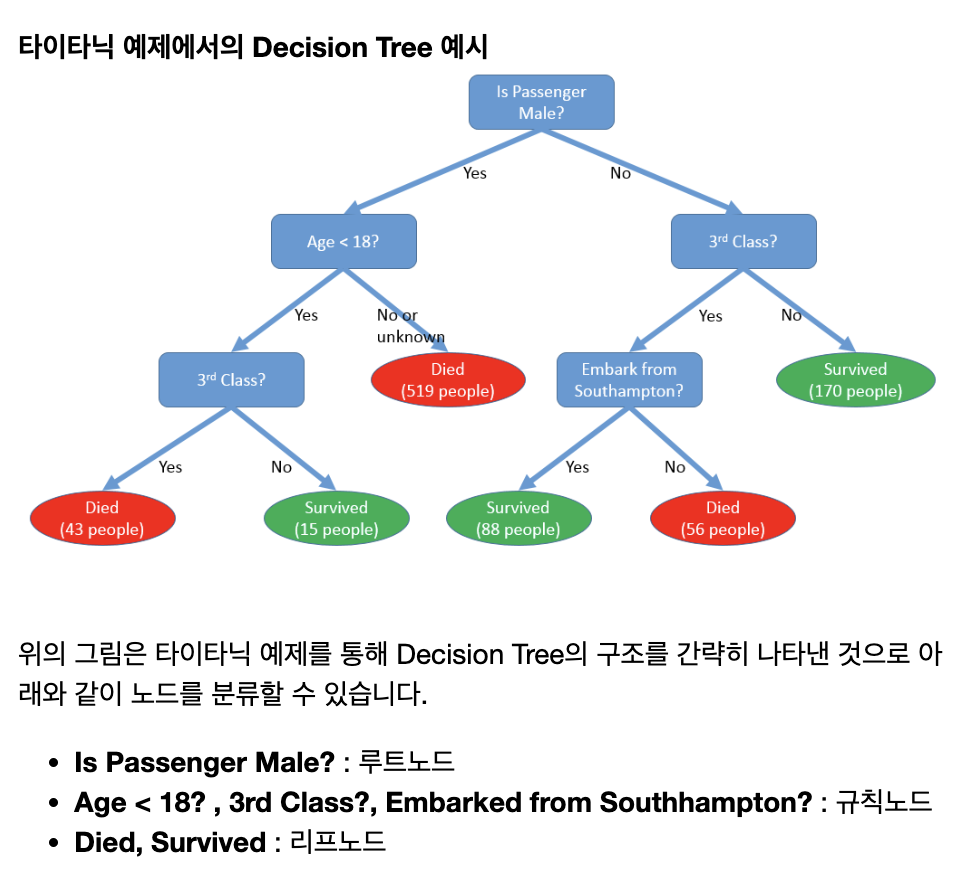

**Decision Tree Classifer의 파라미터**



*   min_samples_leaf

:leaf node가 되기 위해 필요한 최소한 샘플 데이터 수 
:불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요 

*   항목 추가
*   항목 추가


*   항목 추가




In [53]:
param_grid={'max_depth': range(2,20,2),'min_samples_leaf': range(1,50,2)}


In [55]:

grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 50, 2)},
             return_train_score=True)

In [56]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity score: {:.3f}".format(grid_search.best_score_))
print("Test set score {:.3f}".format(grid_search.score(X_test, y_test)))


Best Parameter: {'max_depth': 4, 'min_samples_leaf': 3}
Best Cross-validity score: 0.716
Test set score 0.774


In [58]:
result_grid=pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003706,0.001987,0.002300,0.000639,2,1,"{'max_depth': 2, 'min_samples_leaf': 1}",0.6875,0.6250,0.59375,...,0.607056,0.068698,215,0.698413,0.706349,0.698413,0.708661,0.692913,0.700950,0.005763
1,0.002527,0.000434,0.001671,0.000109,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.6875,0.6875,0.59375,...,0.619556,0.076111,209,0.698413,0.698413,0.698413,0.708661,0.692913,0.699363,0.005114
2,0.002254,0.000050,0.001684,0.000105,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.6875,0.6875,0.59375,...,0.671169,0.049419,122,0.698413,0.698413,0.698413,0.708661,0.732283,0.707237,0.013137
3,0.002481,0.000364,0.001668,0.000108,2,7,"{'max_depth': 2, 'min_samples_leaf': 7}",0.6875,0.6875,0.59375,...,0.671169,0.049419,122,0.698413,0.698413,0.698413,0.708661,0.732283,0.707237,0.013137
4,0.002185,0.000051,0.001627,0.000117,2,9,"{'max_depth': 2, 'min_samples_leaf': 9}",0.6875,0.6875,0.59375,...,0.671169,0.049419,122,0.698413,0.698413,0.698413,0.708661,0.732283,0.707237,0.013137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.002459,0.000076,0.001749,0.000048,18,41,"{'max_depth': 18, 'min_samples_leaf': 41}",0.6875,0.6875,0.68750,...,0.696371,0.010865,2,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
221,0.002446,0.000036,0.001791,0.000090,18,43,"{'max_depth': 18, 'min_samples_leaf': 43}",0.6875,0.6875,0.68750,...,0.696371,0.010865,2,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
222,0.002499,0.000092,0.001941,0.000111,18,45,"{'max_depth': 18, 'min_samples_leaf': 45}",0.6875,0.6875,0.68750,...,0.696371,0.010865,2,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
223,0.002795,0.000203,0.002187,0.000384,18,47,"{'max_depth': 18, 'min_samples_leaf': 47}",0.6875,0.6875,0.68750,...,0.696371,0.010865,2,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694


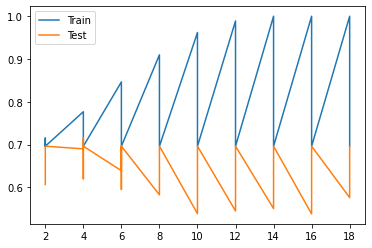

In [60]:
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label='Test')
plt.legend()

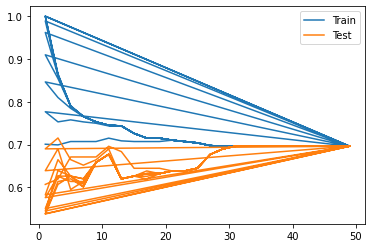

In [61]:
plt.plot(result_grid['param_min_samples_leaf'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_min_samples_leaf'], result_grid['mean_test_score'], label='Test')
plt.legend()

#3. Random Search

In [62]:
param_distribs={'max_depth': randint(low=1, high=20),
                'min_samples_leaf':randint(low=1, high=50)}

random_search=RandomizedSearchCV(DecisionTreeClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)

In [63]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f23bf757e10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f23bf757dd0>},
                   return_train_score=True)

In [64]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity score: {:.3f}".format(random_search.best_score_))
print("Test set score {:.3f}".format(random_search.score(X_test, y_test)))


Best Parameter: {'max_depth': 5, 'min_samples_leaf': 39}
Best Cross-validity score: 0.696
Test set score 0.755


In [66]:
result_random=random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004156,0.000256,0.004915,0.003862,7,24,"{'max_depth': 7, 'min_samples_leaf': 24}",0.65625,0.6875,0.6875,...,0.638508,0.063460,9,0.698413,0.698413,0.698413,0.708661,0.732283,0.707237,0.013137
1,0.003726,0.000253,0.003126,0.000833,5,39,"{'max_depth': 5, 'min_samples_leaf': 39}",0.68750,0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
2,0.005774,0.003328,0.003681,0.001230,19,23,"{'max_depth': 19, 'min_samples_leaf': 23}",0.65625,0.6875,0.6875,...,0.638508,0.063460,9,0.698413,0.698413,0.698413,0.708661,0.732283,0.707237,0.013137
3,0.003747,0.000051,0.002765,0.000052,1,48,"{'max_depth': 1, 'min_samples_leaf': 48}",0.68750,0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
4,0.003772,0.000122,0.002780,0.000267,5,9,"{'max_depth': 5, 'min_samples_leaf': 9}",0.68750,0.7500,0.5000,...,0.658468,0.083727,8,0.753968,0.738095,0.746032,0.771654,0.755906,0.753131,0.011207
5,0.003697,0.000144,0.002928,0.000315,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.68750,0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
6,0.004421,0.001287,0.005969,0.004414,16,37,"{'max_depth': 16, 'min_samples_leaf': 37}",0.68750,0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
7,0.004058,0.000242,0.002947,0.000152,13,31,"{'max_depth': 13, 'min_samples_leaf': 31}",0.68750,0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
8,0.004229,0.000767,0.002799,0.000247,15,48,"{'max_depth': 15, 'min_samples_leaf': 48}",0.68750,0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
9,0.004040,0.000334,0.002899,0.000062,10,39,"{'max_depth': 10, 'min_samples_leaf': 39}",0.68750,0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694


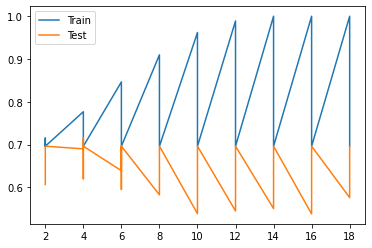

In [67]:
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

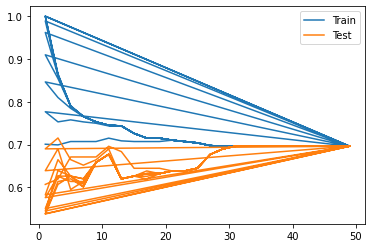

In [68]:
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [80]:
tree=DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

In [70]:
!pip install graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


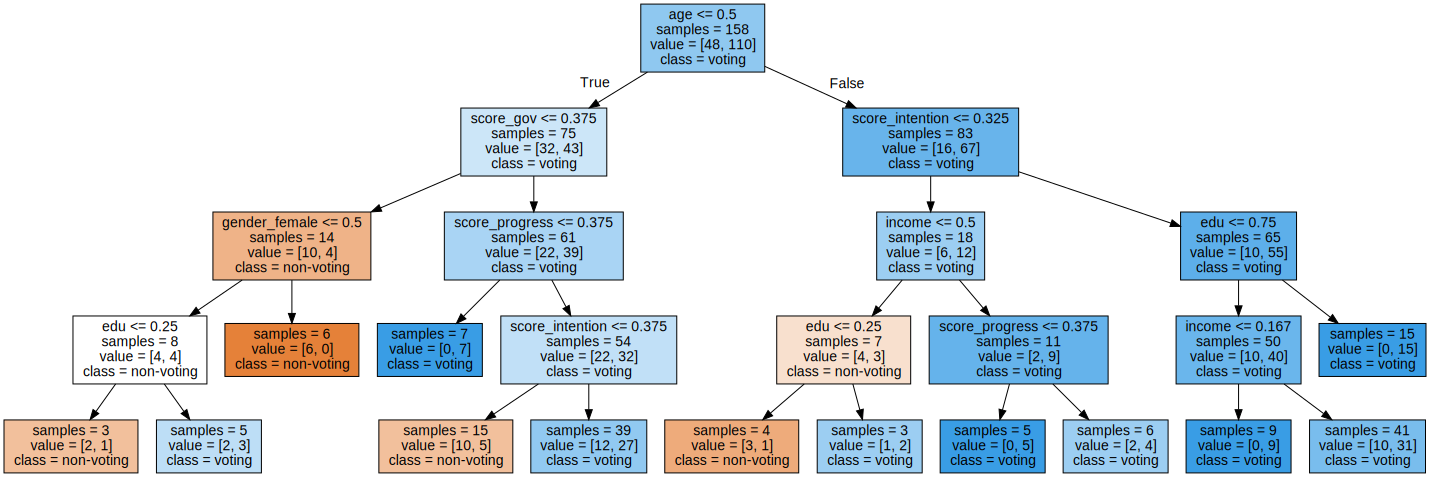

In [81]:
import graphviz
from sklearn.tree import export_graphviz 
export_graphviz(tree, out_file='tree.dot', class_names=['non-voting', 'voting'],
                feature_names=X.columns, impurity=False, filled=True)

with open('tree.dot', encoding='euc-kr') as f:
  dot_graph=f.read()
  display(graphviz.Source(dot_graph))

In [82]:
print("feature importance:\n{}".format(tree.feature_importances_))

feature importance:
[0.08929452 0.         0.         0.         0.         0.
 0.         0.09297696 0.11338358 0.22454216 0.14834275 0.13871857
 0.19274146]


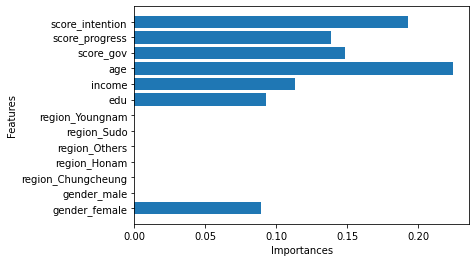

In [83]:
def plot_feature_importances_tree(model):
  n_features=X.shape[1]
  plt.barh(range(n_features), model.feature_importances_,align='center')
  plt.yticks(np.arange(n_features), X.columns)
  plt.xlabel("Importances")
  plt.ylabel("Features")
  plt.ylim(-1, n_features)
  
plot_feature_importances_tree(tree)

#4. 모델평가

In [84]:
tree=DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
tree.fit(X_train, y_train)
pred_train=tree.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 22  26]
 [  8 102]]


In [86]:
pred_test=tree.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[ 7  6]
 [ 5 35]]


In [88]:
f1=f1_score(y_test, pred_test)
print("f1 score:\n", f1)

f1 score:
 0.8641975308641976


In [90]:
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.85      0.88      0.86        40

    accuracy                           0.79        53
   macro avg       0.72      0.71      0.71        53
weighted avg       0.79      0.79      0.79        53



#5. 다중분류 적용: 원데이터 적용 

In [91]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/Fvote.csv', encoding='euc-kr')

In [92]:
data.columns

Index(['Unnamed: 0', 'gender_female', 'gender_male', 'region_Chungcheung',
       'region_Honam', 'region_Others', 'region_Sudo', 'region_Youngnam',
       'edu', 'income', 'age', 'score_gov', 'score_progress',
       'score_intention', 'vote', 'parties'],
      dtype='object')

In [93]:
X1=data[['gender_female', 'gender_male', 'region_Chungcheung',
       'region_Honam', 'region_Others', 'region_Sudo', 'region_Youngnam',
       'edu', 'income', 'age', 'score_gov', 'score_progress',
       'score_intention']]
y1=data['parties']

In [95]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, random_state=42)

In [106]:
param_distribs={'max_depth': randint(low=1, high=20), 'min_samples_leaf': randint(low=1, high=50)}
random_search1=RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_grid, cv=5, return_train_score=True)
random_search1.fit(X1_train, y1_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(2, 20, 2),
                                        'min_samples_leaf': range(1, 50, 2)},
                   return_train_score=True)

In [107]:
print("Best Parameter: {}".format(random_search1.best_params_))
print("Best Cross-validity score: {:.3f}".format(random_search1.best_score_))
print("Test set score {:.3f}".format(random_search1.score(X_test, y_test)))


Best Parameter: {'min_samples_leaf': 5, 'max_depth': 2}
Best Cross-validity score: 0.501
Test set score 0.528


In [108]:
result_grid1=random_search1.cv_results_
pd.DataFrame(result_grid1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006627,0.005567,0.003318,0.001126,41,4,"{'min_samples_leaf': 41, 'max_depth': 4}",0.40625,0.37500,0.40625,...,0.392339,0.023765,9,0.412698,0.412698,0.412698,0.417323,0.409449,0.412973,0.002513
1,0.005641,0.002916,0.004219,0.002894,1,8,"{'min_samples_leaf': 1, 'max_depth': 8}",0.18750,0.37500,0.50000,...,0.399597,0.118018,8,0.936508,0.896825,0.896825,0.874016,0.913386,0.903512,0.020716
2,0.003848,0.000104,0.002639,0.000114,5,16,"{'min_samples_leaf': 5, 'max_depth': 16}",0.31250,0.37500,0.46875,...,0.418347,0.064843,6,0.682540,0.706349,0.706349,0.708661,0.629921,0.686764,0.029985
3,0.003823,0.000278,0.002648,0.000034,21,4,"{'min_samples_leaf': 21, 'max_depth': 4}",0.43750,0.34375,0.46875,...,0.469355,0.076530,3,0.595238,0.539683,0.587302,0.527559,0.503937,0.550744,0.035120
4,0.004074,0.000525,0.002814,0.000527,5,2,"{'min_samples_leaf': 5, 'max_depth': 2}",0.43750,0.46875,0.50000,...,0.500605,0.059813,1,0.595238,0.571429,0.611111,0.511811,0.519685,0.561855,0.039787
5,0.004020,0.000464,0.002680,0.000131,23,16,"{'min_samples_leaf': 23, 'max_depth': 16}",0.43750,0.34375,0.46875,...,0.469355,0.086728,3,0.595238,0.539683,0.587302,0.511811,0.496063,0.546019,0.039580
6,0.004005,0.000387,0.002846,0.000304,43,14,"{'min_samples_leaf': 43, 'max_depth': 14}",0.40625,0.37500,0.40625,...,0.392339,0.023765,9,0.412698,0.412698,0.412698,0.417323,0.409449,0.412973,0.002513
7,0.004212,0.000107,0.002900,0.000185,1,12,"{'min_samples_leaf': 1, 'max_depth': 12}",0.21875,0.34375,0.56250,...,0.405645,0.118044,7,0.992063,0.984127,0.992063,0.937008,0.984252,0.977903,0.020748
8,0.003814,0.000093,0.002879,0.000140,31,14,"{'min_samples_leaf': 31, 'max_depth': 14}",0.43750,0.50000,0.46875,...,0.494153,0.047908,2,0.595238,0.539683,0.587302,0.464567,0.496063,0.536570,0.050696
9,0.004051,0.000117,0.003222,0.000671,23,6,"{'min_samples_leaf': 23, 'max_depth': 6}",0.43750,0.34375,0.46875,...,0.469355,0.086728,3,0.595238,0.539683,0.587302,0.511811,0.496063,0.546019,0.039580


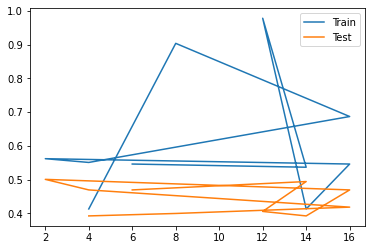

In [109]:
plt.plot(result_grid1['param_max_depth'], result_grid1['mean_train_score'], label="Train")
plt.plot(result_grid1['param_max_depth'], result_grid1['mean_test_score'], label="Test")
plt.legend()

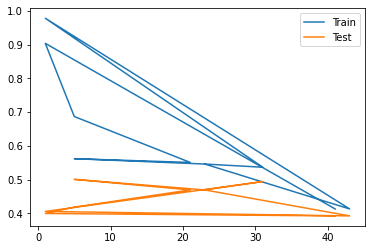

In [110]:
plt.plot(result_grid1['param_min_samples_leaf'], 
         result_grid1['mean_train_score'], label="Train")
plt.plot(result_grid1['param_min_samples_leaf'], 
         result_grid1['mean_test_score'], label="Test")
plt.legend()

In [113]:
tree1=DecisionTreeClassifier(max_depth=218, min_samples_leaf=33)
tree1.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=218, min_samples_leaf=33)

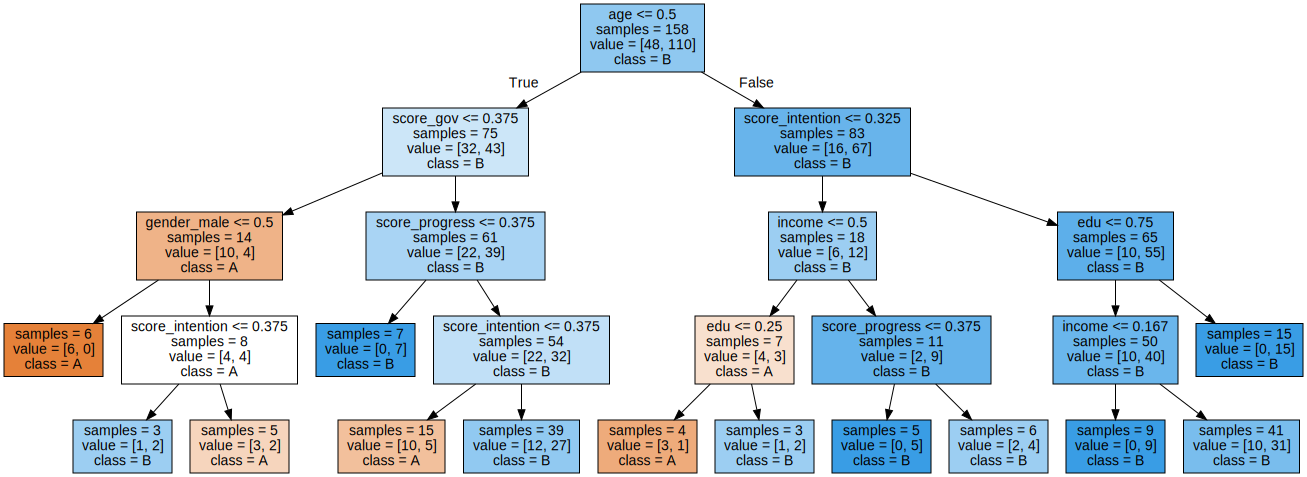

In [114]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_party.dot", class_names=["A", "B", "C", "D"],
                feature_names=X.columns, impurity=False, filled=True)

with open("tree_party.dot", encoding ="euc-kr") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [115]:
print("특성 중요도:\n{}".format(tree1.feature_importances_))

특성 중요도:
[0.         0.08929452 0.         0.         0.         0.
 0.         0.0790867  0.11338358 0.22454216 0.14834275 0.13871857
 0.20663172]


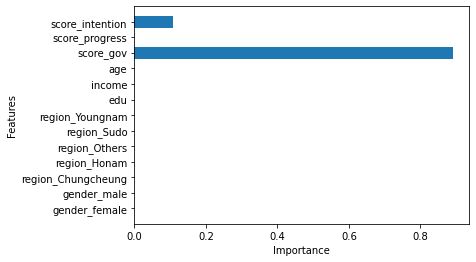

In [117]:
def plot_feature_importances_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_tree(tree1)

In [120]:
pred1_train=tree.predict(X1_train)
confusion1_train=confusion_matrix(y1_train, pred1_train)
print("훈련데이터 오차행렬:\n", confusion1_train)

훈련데이터 오차행렬:
 [[ 0  0  0  0  0]
 [ 2 35  0  0  0]
 [ 9 28  0  0  0]
 [ 3 16  0  0  0]
 [16 49  0  0  0]]


In [119]:
pred1_test=tree1.predict(X1_test)
confusion1_test=confusion_matrix(y1_test, pred1_test)
print("테스트 데이터 오차행렬:\n", confusion1_test)

테스트 데이터 오차행렬:
 [[ 8  1  0  4]
 [ 0 10  0  6]
 [ 3  0  0  3]
 [ 3  2  0 13]]


In [121]:
f1=f1_score(y1_test, pred1_test, average="micro" )
f2=f1_score(y1_test, pred1_test, average="macro" )
print("micro f1 score:\n", f1)
print("macro f1 score:\n", f2)

micro f1 score:
 0.5849056603773585
macro f1 score:
 0.46828921397886913


In [122]:
cfreport=classification_report(y1_test, pred1_test)
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           1       0.57      0.62      0.59        13
           2       0.77      0.62      0.69        16
           3       0.00      0.00      0.00         6
           4       0.50      0.72      0.59        18

    accuracy                           0.58        53
   macro avg       0.46      0.49      0.47        53
weighted avg       0.54      0.58      0.55        53

